### 데이터 인코딩

데이터 전처리
- 데이터 클린징 : 잘못된 값 수정 
- 결손값 처리 : null ,nan 값 처리 -> 레코드 수정 및 삭제 
- 데이터 인코딩 : 머신러닝은 숫자만 받아들임,, 코드값들이나 이름 문자열 데이터들을 숫자로 변경 필요 이를 ( 레이블 , 원-핫 인코딩 ) 이 있음 
- 데이터 스케일링 : 정규화 ex_ 신장이랑 몸무게 단위가 다름 이를 맞춰서 비교할 수 있는 작업을 스케일링이라고 함 
- 이상치 제거 : 턱도 없는 높은 낮은 값있으면 제거
- feature 선택 추출 및 가공 : 너무 많은 feature보다 특정 feature로 학습하는 것이 결과값이 더 좋을 수가 있어서 그것만 선택한다거나 가공을 통해서 보다 좋은 결과값을 추구 

ml 알고리즘은 문자열 데이터 입력 안 되며 모든 데이터는 숫자로 표현되어야함 문자형 받으면 카테고리 속성을 모두 숫자값으로 변환 및 인코딩이 필요하다 

1) 레이블 인코딩 ( label ) 

2) 원-핫 ( one -hot ) 인코딩 


* 레이블 인코딩(Label encoding)

문자열 코드 ( 원소 )를 숫자로 매핑을 함 

ex _tv -> 0 // 냉장고 -> 1

문제점은 각각의 값들을 보면 숫자라서 상호간의 연관성이 생김 1이 0보다 크고 1이 3보다 작고 이런 관계성이 생겨서 알고리즘이 원치않은 방향으로 갈 수 있음  지멋대로 해석 ...;



In [1]:
# 레이블 인코딩하기! 
from sklearn.preprocessing import LabelEncoder

# 항목들을 레이블 인코더 사용해서 객체생성 
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행.
# encoder 라는 객체 생성  
encoder = LabelEncoder()

#fit은 변환 작업 전 와꾸 맞추기 
encoder.fit(items)

# 비지도 학습은 fit 과 transform 쓰고 이를 데이터 변환시에도 사용한다 
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [ ]:
print('인코딩 클래스:',encoder.classes_)
# 원래 해당 속성 값들 보기 

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [ ]:
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))
# 숫자가 무슨 값들을 뜻하는지 확인 

디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


* 원-핫 인코딩(One-Hot encoding)

하나만 핫하다!!

문자열 원소에 대한 값 피쳐! 차원을 증가시켜서 새로운 고유값에 대한 칼럼을 생성 
해당하는 값만 1 나머지는 0 

값에 해당하는 새로운 백터를 생성하고 이 컬럼? 데이터프레임을 참고해서 값을 알아냄 
이러면 숫자간의 연관성이 안생긴다 


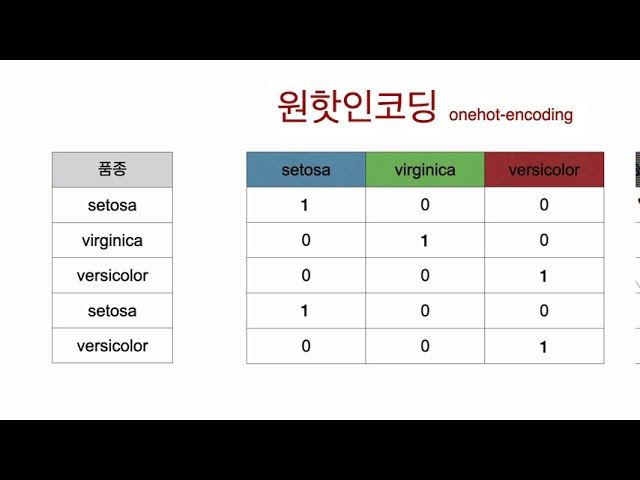

사이킷런에서 원핫 인코딩은 
원본데이터를 레이블 데이터로 변환 후 이걸 다시 원-핫 인코딩해서 사용한다 

tv-> 4 -> 2차원 데이터 프레임에서 냉장고 위치에 1로 표시 [010000]

이렇게 두번 인코딩하기 귀찮은 

pd.get_dummies(DataFrame) 

호출하면 한번에 작업 클리어 

In [ ]:
# 원-핫 인코더 사용하기 
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 원핫인코더가 스스로 숫자값으로 못만드니까 수동으로 변환 필요

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 값이 원래 1차원인데 이걸 2차원으로 바꿔줘야 2차원으로 010000 이런식으로 바꾼다
# 2차원 데이터로 변환합니다. 
labels = labels.reshape(-1,1)

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [ ]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
df

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [ ]:
pd.get_dummies(df)
# 2번 변환 필요없이 바로 2차원으로 변경해서 원-핫으로 바꿔줌 
# item에 대한 고유값들이 컬럼으로 변경됨 

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 피처 스케일링과 정규화

표준화 
- 데이터 각각의 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값 변환 시킴 

정규화
- 서로 다른 피처의 크기를 통일해줌 
- eX_ 연봉이 100만원 1억 등등 이 있으니 이걸 통일시키는?? 


* StandardScaler

- 평균이 0이고 분산이 1인 정규 분포 형태로 변환 

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

# 값들이 평균이 0이 아니고 분산도 1이 아님 

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.054000
petal length (cm)    3.758667
petal width (cm)     1.198667
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.188004
petal length (cm)    3.113179
petal width (cm)     0.582414
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
#변환된 값이 ndarray현태로 변환 
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

# 거의 0임
print('feature 들의 평균 값')
print(iris_df_scaled.mean())

# 1.00 몇이니까 거의 1임 
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

# 평균이 0 분산이 1인 거로 변환

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.637024e-15
petal length (cm)   -1.482518e-15
petal width (cm)    -1.623146e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


* MinMaxScaler
- 데이터값을 0과 1사이의 범위값으로 변환 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())


feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64
